In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read data

In [83]:
df_usage = pd.read_csv('train/app_usage.csv') # pd.read_csv('test/test_app_usage.csv') 
df_visits = pd.read_csv('train/web_visits.csv')
# df_claims = pd.read_csv('train/claims.csv')
# df_churn_labels = pd.read_csv('train/churn_labels.csv')

In [81]:
df_usage.head()

,member_id,event_type,timestamp
0,1,session,2025-07-05 07:03:13
1,1,session,2025-07-05 20:10:22
2,1,session,2025-07-09 22:49:26
3,1,session,2025-07-12 08:35:18
4,1,session,2025-07-12 22:00:26


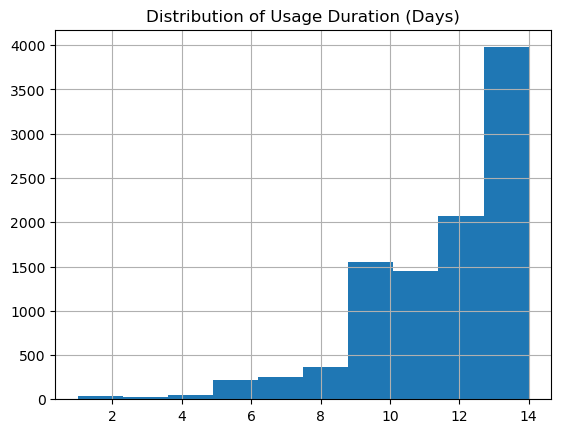

In [84]:
df_usage_dates = df_usage.groupby('member_id').agg(
    min_date=('timestamp', 'min'),
    max_date=('timestamp', 'max')
)
df_usage_dates['duration_days'] = (pd.to_datetime(df_usage_dates['max_date']) - pd.to_datetime(df_usage_dates['min_date'])).dt.days + 1
df_usage_dates['duration_days'].hist()
plt.title('Distribution of Usage Duration (Days)');

In [89]:
tmp = pd.merge(df_usage_dates.reset_index(), df_churn_labels, on='member_id')

In [10]:
gap_df = pdata.df_visits.groupby('member_id')['timestamp'].apply(pdata.gap_stats).unstack().reset_index()

,member_id,url,title,description,timestamp
0,1,https://health.wellco/chronic/859,Diabetes management,Blood sugar and glycemic control,2025-07-02 22:38:22
1,1,https://portal.site/tech/328,Gadget roundup,Smartphones and laptops news,2025-07-02 11:30:47
2,1,https://health.wellco/heart/792,Hypertension basics,Blood pressure and lifestyle changes,2025-07-14 00:38:39
3,2,https://example.com/gaming/674,Game reviews,Strategy tips and updates,2025-07-07 02:56:06
4,2,https://living.better/stress/325,Stress reduction,Mindfulness and wellness,2025-07-02 15:53:38


In [23]:
df_claims.head()

,member_id,icd_code,diagnosis_date
0,1,Z71.3,2025-07-09
1,1,Z71.3,2025-07-14
2,1,J00,2025-07-12
3,1,M54.5,2025-07-01
4,1,I10,2025-07-12


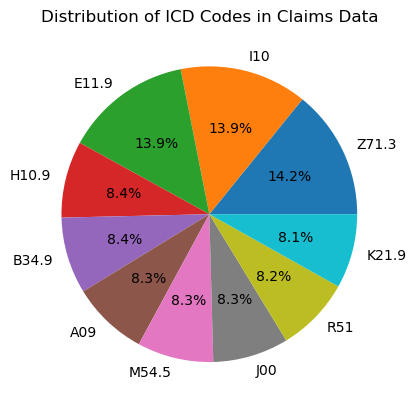

In [22]:

labels = df_claims['icd_code'].value_counts().index
plt.pie(df_claims['icd_code'].value_counts(), labels=labels, autopct='%1.1f%%');
plt.title('Distribution of ICD Codes in Claims Data')
plt.show()

In [39]:
df_churn_labels

,member_id,signup_date,churn,outreach
0,1,2024-04-12,0,0
1,2,2025-03-11,0,0
2,3,2024-09-27,0,0
3,4,2024-04-16,1,0
4,5,2024-03-12,0,1
...,...,...,...,...
9995,9996,2024-09-02,0,0
9996,9997,2024-02-07,0,0
9997,9998,2024-09-01,0,0
9998,9999,2024-01-21,0,0


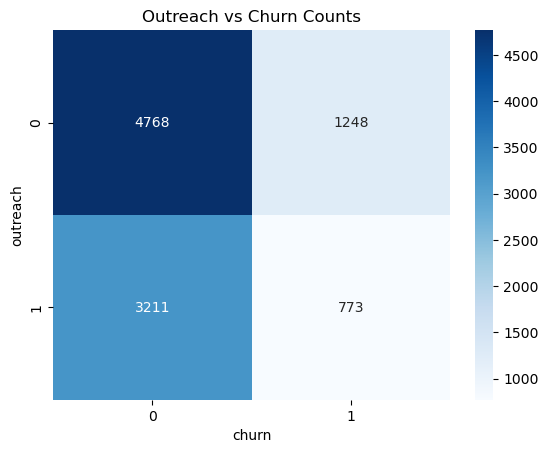

In [51]:
import seaborn as sns

corr = np.corrcoef(df_churn_labels['outreach'], df_churn_labels['churn'])[0, 1]
corr

crosstab = pd.crosstab(df_churn_labels['outreach'], df_churn_labels['churn'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Outreach vs Churn Counts')
plt.show()

In [60]:
corr_outreach_churn = np.corrcoef(df_churn_labels['churn'], df_churn_labels['outreach'])[0, 1]
print(f"Correlation between Outreach and Churn: {corr_outreach_churn:.3f}")

Correlation between Outreach and Churn: -0.016


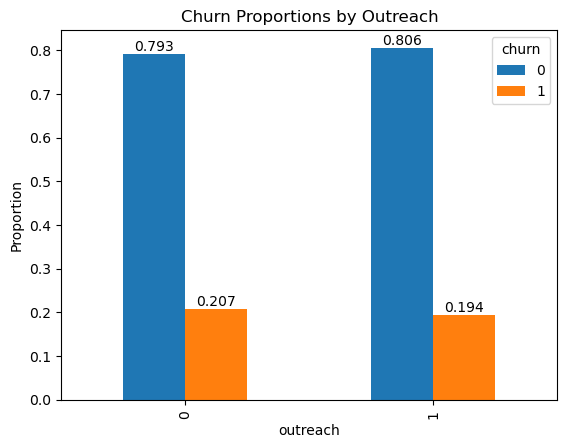

In [70]:
outreach_churn = df_churn_labels.groupby('outreach')['churn'].value_counts(normalize=True).unstack()
ax = outreach_churn.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Churn Proportions by Outreach')
plt.ylabel('Proportion')
plt.show()